# Data Collection, Data Cleaning and EDA Project

## Problem Statement:
**The objective of this project is to collect, analyze, and visualize data from IMDb's movie list to gain insights into popular movies.**

In [ ]:
# importing libraries
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

In [ ]:
url ='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page='
print(url)

https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=


In [ ]:
title=[]
genre1=[]
time_duration=[]
rating=[]
year=[]
directors=[]
stars=[]
votes=[]
gross =[]
proxies = {
    'http': 'http://your_proxy_address',
    'https': 'http://your_proxy_address',
}

url_base='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page='
urls_list = []
for i in range(1, 6):
    url = url_base + str(i)
    urls_list.append(url)
    print(url)

    page =requests.get(url,proxies,timeout=30)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all('h3', class_ = 'lister-item-header'):
        text=i.text
        regex=re.findall(r'[\d+\.\s\w+:\,\d\s-]*',text)
        if regex:
            title.append(regex[0])
        else:
            title.append(np.nan)

    container = soup.find_all('div', class_='lister-item-content' )
    for i in container:


        genre_ =i.find('span', class_ = 'genre').text
        genre1.append(genre_)



        timeduration1= i.find('span', class_ = 'runtime').text
        regex=re.findall('\d+',timeduration1)
        if len(regex) >0:
             time_duration.append(regex[0])
        else:
            time_duration.append(np.nan)



        rating_= i.find('div', class_ = 'ipl-rating-star small').text
        regex=re.findall(r'\d.*',rating_)
        rating.append(regex[0])



        year_= i.find('span', class_ = 'lister-item-year text-muted unbold').text
        regex=re.findall(r'\d+',year_)
        if len(regex) >0:
             year.append(regex[0])
        else:
             year.append(np.nan)



    for i in soup.find_all('div',class_='lister-item-content'):
        text=i.text
        regex=re.findall(r'(?:Director|Directors):\s(\w+\s\w+)' , text)
        if len(regex) >0:
            directors.append(regex[0])
        else:
            directors.append(np.nan)

    for i in soup.find_all('div',class_='lister-item-content'):
        text=i.text
        regex=re.findall(r'Stars:\s(.*?)(?=\n)',text)
        if len(regex) >0:
            stars.append(regex[0])
        else:
            stars.append(np.nan)

    for i in soup.find_all('div',class_='lister-item-content'):
        text=i.text
        regex=re.findall(r'\$\s*(\d+\.\d+)',text)
        if len(regex) >0:
            gross.append(regex[0])
        else:
            gross.append(np.nan)


    for i in soup.find_all('div', class_= 'lister-item-content'):
        text=i.text
        regex=re.findall(r'Votes:\s*([\d,]+)',text)
        if len(regex)>0:
            votes.append(regex[0])
        else:
            votes.append(np.nan)


print(urls_list)

https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=1
https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=2
https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=3
https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=4
https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=5
['https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=1', 'https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=2', 'https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=3', 'https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=4', 'https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=5']


## Creating the Data Frame

In [ ]:
df = pd.DataFrame({'Title': title,
                  'Genre': genre1,
                  'Time_Duration':time_duration,
                  'Rating': rating,
                  'Year': year,
                  'Directors':directors ,
                  'Stars':stars,
                  'Votes':votes,
                  'Gross':gross  })

## Cleaning the Data

In [ ]:
df

,Title,Genre,Time_Duration,Rating,Year,Directors,Stars,Votes,Gross


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          487 non-null    object
 1   Genre          487 non-null    object
 2   Time_Duration  487 non-null    object
 3   Rating         487 non-null    object
 4   Year           487 non-null    object
 5   Directors      473 non-null    object
 6   Stars          487 non-null    object
 7   Votes          487 non-null    object
 8   Gross          414 non-null    object
dtypes: object(9)
memory usage: 34.4+ KB


In [ ]:
for i in range(len(df['Title'])):
    df['Title'] = df['Title'].replace(r'\n', ' ', regex=True)
    df['Title'] = df['Title'].replace(r'\d+', ' ', regex=True)
    df['Title'] = df['Title'].replace(r'\.', ' ', regex=True)


In [ ]:
df['Title']

0                              The Shawshank Redemption 
1                                         The Godfather 
2                                       The Dark Knight 
3                                 The Godfather Part II 
4          The Lord of the Rings: The Return of the K...
                             ...                        
482                                              Freaks 
483                                        Frankenstein 
484                                    Infernal Affairs 
485                            The Manchurian Candidate 
486                                  The Man from Earth 
Name: Title, Length: 487, dtype: object

In [ ]:
for i in range(len(df['Genre'])):
    df['Genre'] = df['Genre'].replace(r'\n', '',regex=True).replace(r'\,', '',regex=True)

In [ ]:
df['Genre']

0                       Drama            
1                 Crime Drama            
2          Action Crime Drama            
3                 Crime Drama            
4      Action Adventure Drama            
                      ...                
482              Drama Horror            
483       Drama Horror Sci-Fi            
484        Action Crime Drama            
485            Drama Thriller            
486     Drama Fantasy Mystery            
Name: Genre, Length: 487, dtype: object

In [ ]:
for i in range(len(df['Votes'])):
    df['Votes'] = df['Votes'].replace(r'\,' , '',regex=True)

In [ ]:
df['Votes']

0      2817336
1      1963476
2      2798866
3      1333056
4      1929299
        ...   
482      49501
483      78080
484     129395
485      78481
486     196084
Name: Votes, Length: 487, dtype: object

In [ ]:
df['Time_Duration'] =df['Time_Duration'].astype('int')

In [ ]:
df['Rating'] =df['Rating'].astype('float')

In [ ]:
df['Year'] =df['Year'].astype('int')

In [ ]:
df['Votes'] =df['Votes'].astype('int')

In [ ]:
df['Gross'] = df['Gross'].astype('float')


In [ ]:
df['Gross'] =df['Gross'].fillna(df['Gross'].mean())

In [ ]:
df['Directors']=df['Directors'].fillna(df['Directors'].mode()[0])

In [ ]:
df['Directors'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Genre          487 non-null    object 
 2   Time_Duration  487 non-null    int64  
 3   Rating         487 non-null    float64
 4   Year           487 non-null    int64  
 5   Directors      487 non-null    object 
 6   Stars          487 non-null    object 
 7   Votes          487 non-null    int64  
 8   Gross          487 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 34.4+ KB


In [ ]:
df

,Title,Genre,Time_Duration,Rating,Year,Directors,Stars,Votes,Gross
0,The Shawshank Redemption,Drama,142,9.3,1994,Frank Darabont,"Tim Robbins,",2817336,28.340000
1,The Godfather,Crime Drama,175,9.2,1972,Francis Ford,"Marlon Brando,",1963476,134.970000
2,The Dark Knight,Action Crime Drama,152,9.0,2008,Christopher Nolan,"Christian Bale,",2798866,534.860000
3,The Godfather Part II,Crime Drama,202,9.0,1974,Francis Ford,"Al Pacino,",1333056,57.300000
4,The Lord of the Rings: The Return of the K...,Action Adventure Drama,201,9.0,2003,Peter Jackson,"Elijah Wood,",1929299,377.850000
...,...,...,...,...,...,...,...,...,...
482,Freaks,Drama Horror,64,7.8,1932,Tod Browning,"Wallace Ford,",49501,0.630000
483,Frankenstein,Drama Horror Sci-Fi,70,7.8,1931,James Whale,"Colin Clive,",78080,73.444565
484,Infernal Affairs,Action Crime Drama,101,8.0,2002,Andrew Lau,"Andy Lau,",129395,0.170000
485,The Manchurian Candidate,Drama Thriller,126,7.9,1962,John Frankenheimer,"Frank Sinatra,",78481,73.444565


## Exporting the data frame into .csv format

In [ ]:
df.to_csv('project1.csv')

## Data Analysis and Visualization (EDA)

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(df.describe())

       Time_Duration      Rating         Year         Votes       Gross
count     487.000000  487.000000   487.000000  4.870000e+02  487.000000
mean      123.622177    8.100000  1984.648871  4.496675e+05   73.444565
std        28.869027    0.259392    25.127287  4.811969e+05   98.653008
min        45.000000    7.700000  1920.000000  3.333100e+04    0.010000
25%       102.500000    7.900000  1965.500000  9.161050e+04    5.525000
50%       119.000000    8.100000  1992.000000  2.491050e+05   40.220000
75%       137.000000    8.200000  2006.000000  6.971495e+05   74.890000
max       238.000000    9.300000  2018.000000  2.817336e+06  678.820000


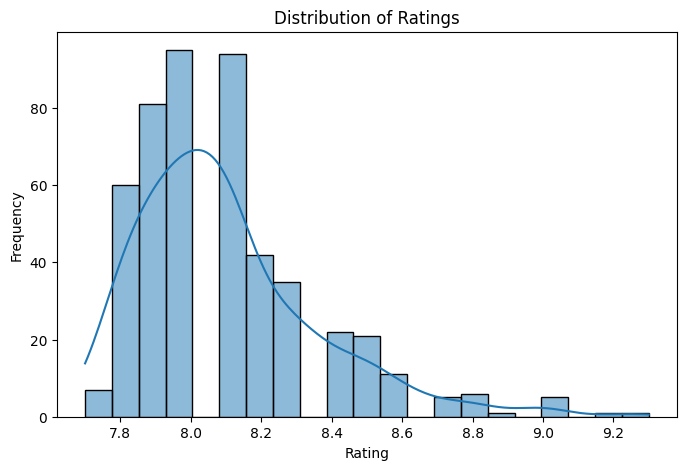

In [ ]:
# Create a histogram plot with kernel density estimation (KDE) for the 'Rating' column in the DataFrame 'df'
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Here,the shape of the distribution indicates that it is positively skewed which suggests more movies have higher ratings.And also the fact that mean,median and mode are around 8.1 and 8.0 tells us that larger portion of dataset have received higher ratings.

The movies are tend to receive higher ratings when audiences expectations are met.This insight could be valuable for film makers and studios, indicating the importance of meeting audience expectations to receive positive feedback.

In [ ]:
mean_rating = df['Rating'].mean()
print("Mean Rating:", mean_rating)

Mean Rating: 8.1


In [ ]:
median_rating = df['Rating'].median()
print("Median Rating:", median_rating)

Median Rating: 8.1


In [ ]:
mode_rating = df['Rating'].mode()
print("Mode Rating:", mode_rating)

Mode Rating: 0    8.0
Name: Rating, dtype: float64


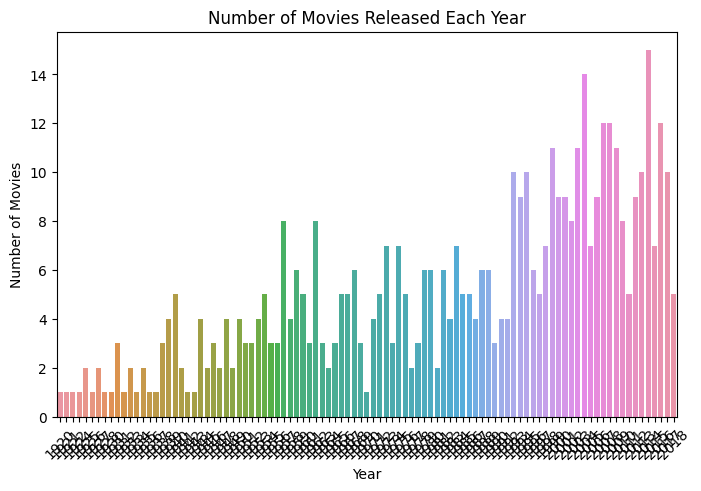

In [ ]:
# Create a countplot  for the 'year' column in the DataFrame 'df' to find out how many movies released each year
plt.figure(figsize=(8, 5))
sns.countplot( x='Year',data=df)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45,fontsize=10)
plt.show()

The plot shows the number of movies released each year, giving an overview of the movie production trend over the years.

There are specific years where the number of movie releases peaks. These peaks could be due to various factors such as economic conditions, technological advancements, or cultural influences that encouraged higher film production.And the years with a noticeable decrease in movie releases might indicate economic downturns or other factors leading to reduced film production.

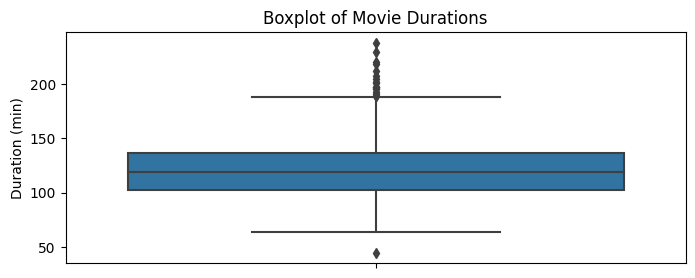

In [ ]:
# create boxplot of time durations of movies
plt.figure(figsize=(8, 3))
sns.boxplot(y=df['Time_Duration'])
plt.title('Boxplot of Movie Durations')
plt.ylabel('Duration (min)')
plt.show()

In [ ]:
df['Time_Duration'].median() #  median here indicates that half of the movies in the dataset have durations less than or equal to 119 minutes, and the other half have durations greater than or equal to 119 minutes.

119.0

In [ ]:
Q1 = df['Time_Duration'].quantile(0.25)
Q3 = df['Time_Duration'].quantile(0.75)

IQR = Q3-Q1
IQR #an IQR of 35.0 means that the middle 50% of the data falls within a range of 35.0 units for variable 'Time_Duration'

34.5

In [ ]:
Q1 = df['Time_Duration'].quantile(0.25)
Q1 # Q1 represents the 25th percentile, indicating that 25% of the movies have durations less than or equal to 103 minutes.

102.5

In [ ]:
Q3 = df['Time_Duration'].quantile(0.75)
Q3 # Q3 represents the 75th percentile, indicating that 75% of the movies have durations less than or equal to 138 minutes.

137.0

Here, median is 119.0 that says viewers can expect a movie's time duration to be around the median value i.e., 119.0 which provides an idea of the average length of movies in the dataset.

The IQR of 35.0 minutes suggests moderate variability in movie lengths within the middle 50% of the data.

Outtliers here represent exceptionally short or long movies compared to the majority of films in the dataset.

With the help of boxplot one can understand central tendency and variability in movie durations which is valuable for filmmakers and producers as it provides insights into audience expectations and allows film makers to create movies that align with audience preferences.

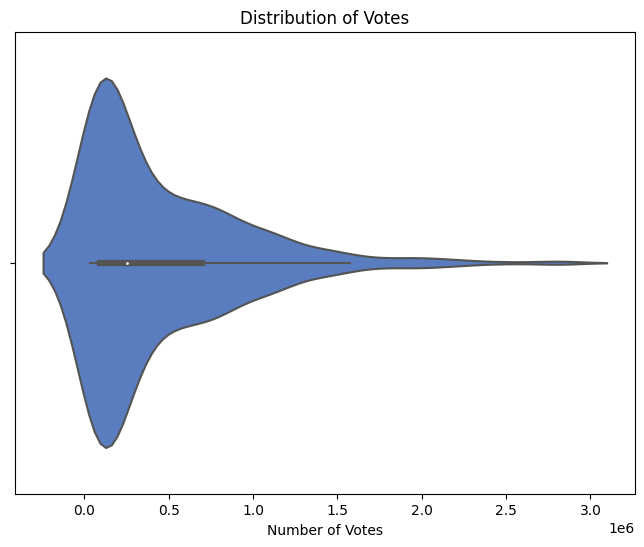

In [ ]:
# create violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Votes', data=df, palette='muted')
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.show()

In [ ]:
df['Votes'].median()

249105.0

In [ ]:
df['Votes'].mean()

449667.498973306

In [ ]:
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)

IQR = Q3-Q1
IQR

605539.0

In [ ]:
Q1 = df['Votes'].quantile(0.25)
Q1

91610.5

In [ ]:
Q3 = df['Votes'].quantile(0.75)
Q3

697149.5

The median number of votes (49068.0) indicates that half of the movies in the dataset received fewer votes than this value, and half received more votes.

The interquartile range (IQR), this wide range indicates significant variability in the number of votes received by movies. Some movies have very low vote counts, while others have exceptionally high engagement, leading to a broad spread of votes.

Text(0, 0.5, 'Frequency')

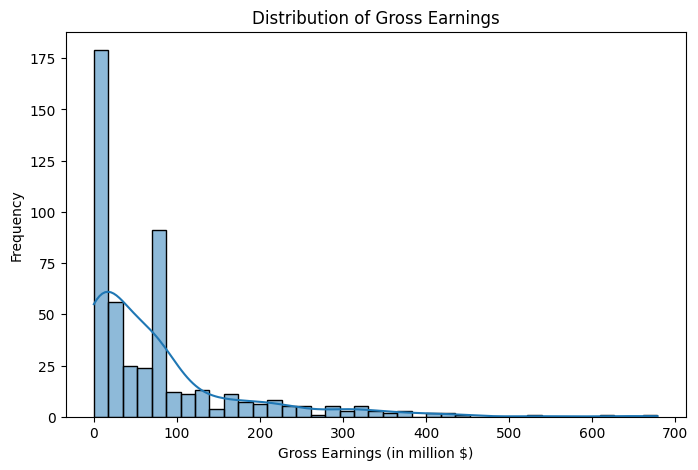

In [ ]:
# create histplpt
plt.figure(figsize=(8, 5))
sns.histplot(df['Gross'], kde=True)
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross Earnings (in million $)')
plt.ylabel('Frequency')

In [ ]:
df['Gross'].mean()

73.4445652173913

In [ ]:
df['Gross'].median()

40.22

The histogram shows a right -skewed distribution of gross earnings where most movies have lower earnings and a few movies with exceptonally higher earnings

The density of movies decreases as earnings increases.Here its evident that the frequency is decreasing as earnings are increasing.

The plot provides insights into the distribution of financial performance of movies within the financial industry.

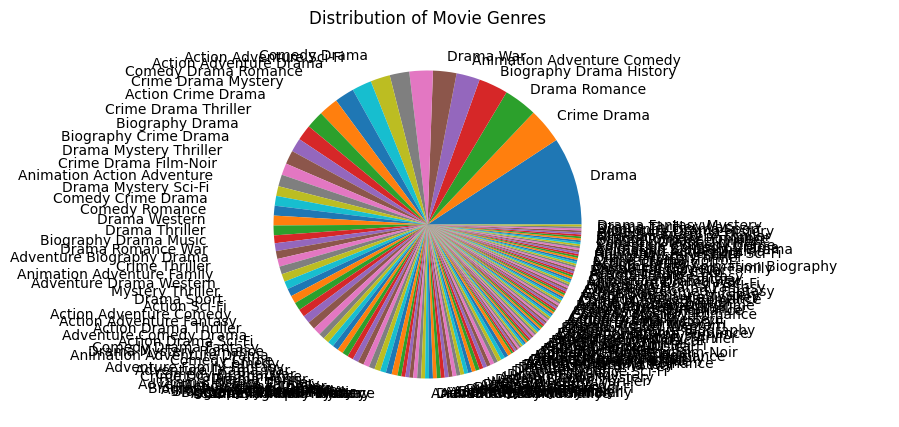

In [ ]:
# create pie chart
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(15, 5))
plt.pie(genre_counts, labels=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.show()

Here the drama genre has a particularly large slice ,it suggests that a significant portion of the movies in the dataset belong to the Drama genre

There are also many smaller slices in the pie chart, it indicates a diverse range of genres within the dataset

Analyzing popular genres can help marketers and filmmakers understand what genres are currently in demand among viewers.

##Bivariate / Multivariate Analysis

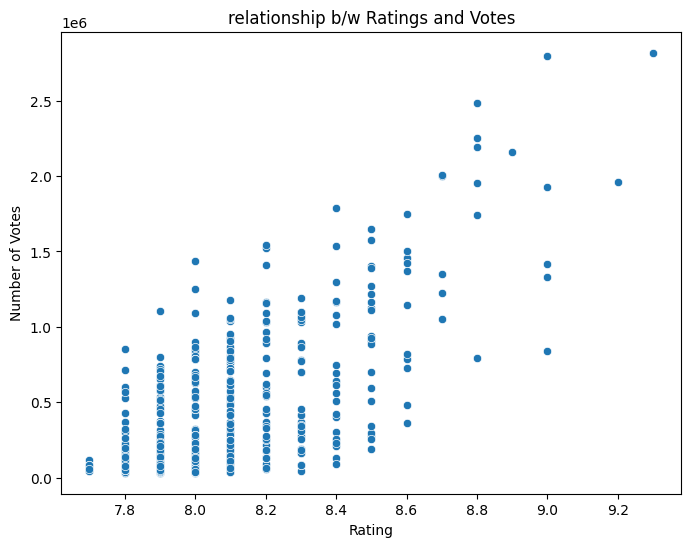

In [ ]:
# Scatter plot for finding out relationship b/w Rating and Votes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Votes', data=df)
plt.title('relationship b/w Ratings and Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()

In [ ]:
# Calculate the  correlation coefficient
correlation_coefficient = np.corrcoef(df['Rating'], df['Votes'])[0, 1]

print(correlation_coefficient)

0.6835177506627902


In [ ]:
grouped_by_rating = df.groupby('Rating')['Votes'].mean()
print(grouped_by_rating)

Rating
7.7    7.244429e+04
7.8    1.773689e+05
7.9    2.490710e+05
8.0    3.013359e+05
8.1    3.627640e+05
8.2    5.961329e+05
8.3    5.690539e+05
8.4    6.865496e+05
8.5    8.924035e+05
8.6    1.074928e+06
8.7    1.527053e+06
8.8    1.903439e+06
8.9    2.160499e+06
9.0    1.663380e+06
9.2    1.963476e+06
9.3    2.817336e+06
Name: Votes, dtype: float64


The scatter plot shows a  positive correlation between ratings and the number of votes. As ratings increase, there seems to be a tendency for movies to receive more votes. This suggests that well-rated movies  attract more attention and engagement from the audience.

For film makers and producers, the plot suggests that achieving high ratings and votes may contribute to a movie's success in terms of audience engagement.However, the relationship is not strictly linear, and other factors, such as marketing, release strategy, and genre, can influence the number of votes.

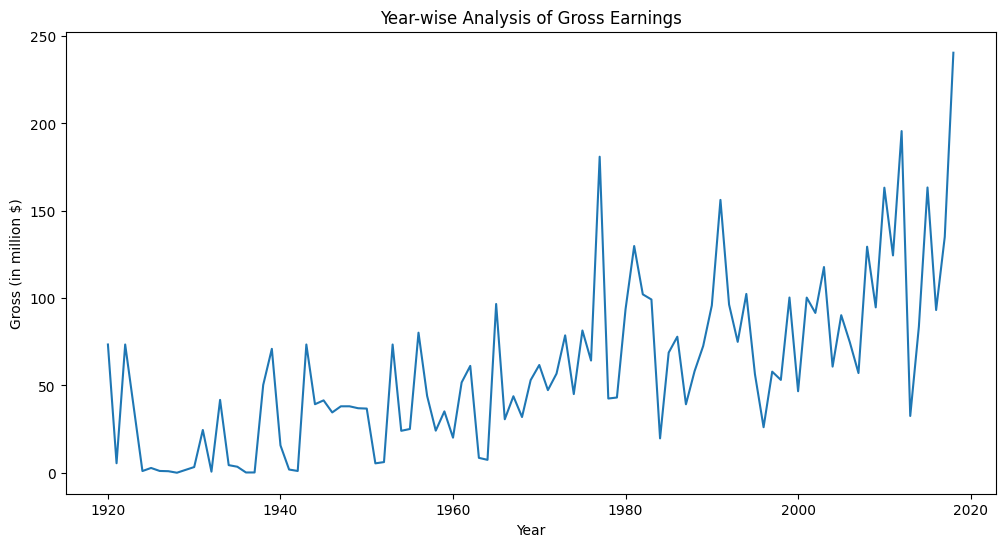

In [ ]:
# Create line plot to analyse Gross earnings each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Gross', data=df, ci=None)
plt.title('Year-wise Analysis of Gross Earnings')
plt.xlabel('Year')
plt.ylabel('Gross (in million $)')
plt.show()

In [ ]:
pivot_table = df.pivot_table(values='Gross', index='Year', aggfunc='sum')
print(pivot_table)

            Gross
Year             
1920    73.444565
1921     5.450000
1922    73.444565
1924     0.980000
1925     5.500000
...           ...
2014  1254.440000
2015  1143.530000
2016  1118.254565
2017  1350.404565
2018  1202.590000

[97 rows x 1 columns]


The plot allows us to observe the variability in gross earnings from year to year. Peaks or troughs in the line indicate periods of higher or lower earnings, respectively. This variability could be influenced by factors such as economic conditions, industry trends, or the release of blockbuster movies in specific years.

Stakeholders, including film makers, producers, and investors, can use these insights to understand performance of movies over the years.

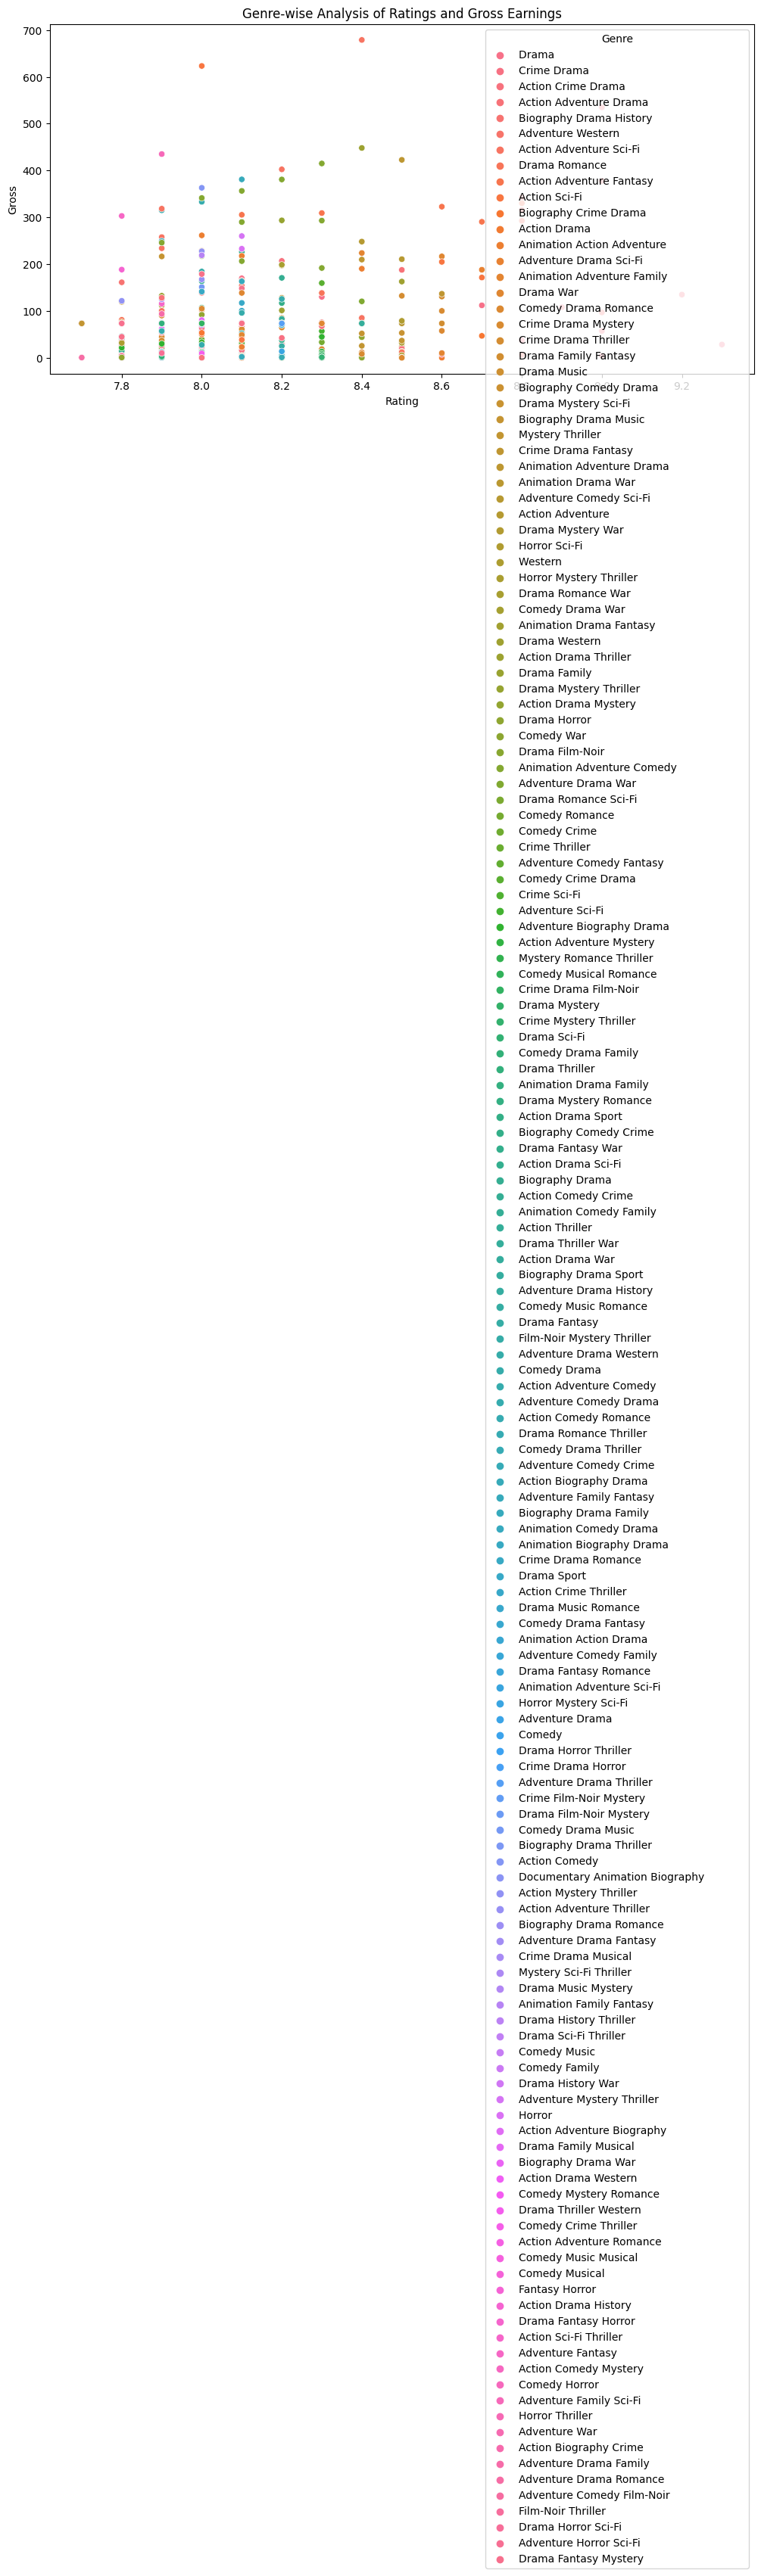

In [ ]:
# Scatter plot for Genre-wise Analysis of Ratings and Gross Earnings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Gross', hue='Genre', data=df)
plt.title('Genre-wise Analysis of Ratings and Gross Earnings')
plt.show()

In [ ]:
cross_tab = pd.crosstab(index=df['Rating'], columns=df['Genre'], values=df['Gross'], aggfunc='mean')
print(cross_tab)

Genre   Action Adventure              Action Adventure Biography              \
Rating                                                                         
7.7                              NaN                                     NaN   
7.8                              NaN                               73.444565   
7.9                              NaN                                     NaN   
8.0                              NaN                                     NaN   
8.1                              NaN                                     NaN   
8.2                           197.17                                     NaN   
8.3                              NaN                                     NaN   
8.4                           248.16                                     NaN   
8.5                              NaN                                     NaN   
8.6                              NaN                                     NaN   
8.7                              NaN    

The scatter plot reveals a diverse distribution of movies across different genres, showcasing the range of ratings and gross earnings within each genre.


Filmmakers and producers can use this plot to understand the ratings and gross earnings of movies within specific genres. It provides insights into audience preferences,decision making for movie planning and opportunities within  each genre.

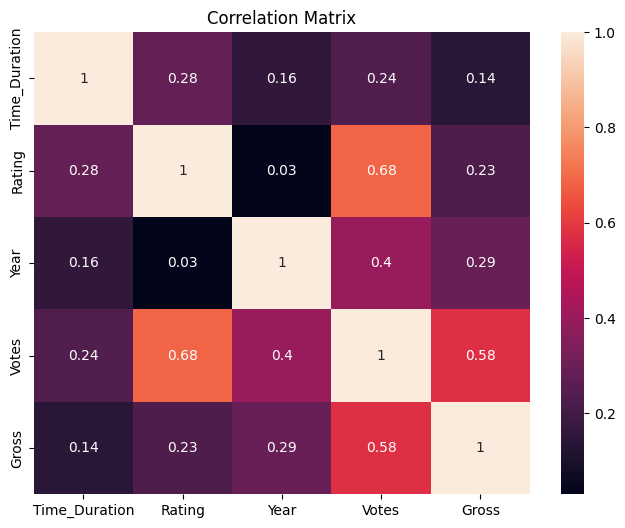

In [ ]:
# create heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Rating' and 'Votes' show a moderately strong positive correlation (0.68), indicating that movies with higher ratings tend to attract more votes
Votes' and 'Gross' also exhibit a positive correlation (0.57), suggesting that movies with more votes tend to have higher gross earnings.
correlation matrix provides a basis for understanding how different variables in the dataset are related to each other, offering insights into potential trends and patterns within the data.

In [ ]:
crosstab_result = pd.crosstab(index=df['Genre'], columns=df['Year'])
print(crosstab_result)

Year                                    1920  1921  1922  1924  1925  1926  \
Genre                                                                        
Action Adventure                           0     0     0     0     0     0   
Action Adventure Biography                 0     0     0     0     0     0   
Action Adventure Comedy                    0     0     0     0     0     1   
Action Adventure Drama                     0     0     0     0     0     0   
Action Adventure Fantasy                   0     0     0     0     0     0   
...                                      ...   ...   ...   ...   ...   ...   
Horror Thriller                            0     0     0     0     0     0   
Mystery Romance Thriller                   0     0     0     0     0     0   
Mystery Sci-Fi Thriller                    0     0     0     0     0     0   
Mystery Thriller                           0     0     0     0     0     0   
Western                                    0     0     0     0  